# **Libraries and Imports**

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import module as md


Reading Data

In [167]:
df=pd.read_csv("used_cars_data.csv")

In [168]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# **EDA**

In [169]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Mileage,object,450,7251,2,"[26.6 km/kg, 19.67 kmpl, 18.2 kmpl, 20.77 kmpl..."
9,Engine,object,150,7207,46,"[998 CC, 1582 CC, 1199 CC, 1248 CC, 1968 CC, 8..."


Removing Nulls Greater than 70%

In [170]:
nulls=df.columns[df.isna().mean()>=0.7]
nulls

Index(['New_Price'], dtype='object')

In [171]:
df.drop(columns=nulls , inplace=True)

Data Engenering for Mileage

## function to change Km/kg based on the fuel type (diesel , petrol ,cng)

In [172]:
def add_kmkg_column(df, mileage_col='Mileage', fuel_col='Fuel_Type', kmkg_col='km_kg'):
    fuel_densities = {'Diesel': 0.85,'Petrol': 0.74,'CNG': 1}
    df[mileage_col] = df[mileage_col].str.extract(r'(\d+\.?\d*)').astype(float)
    df[kmkg_col] = df.apply(
        lambda row: row[mileage_col] / fuel_densities.get(row[fuel_col], 1)
        if pd.notnull(row[mileage_col]) else None,
        axis=1
    )
    return df



In [173]:
neww_df=add_kmkg_column(df)

In [174]:
neww_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,km_kg
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75,26.600000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,23.141176
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,24.594595
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,24.435294
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,17.882353


In [175]:
df.drop(columns="Mileage" , inplace=True)

In [176]:
md.data_info(neww_df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Engine,object,150,7207,46,"[998 CC, 1582 CC, 1199 CC, 1248 CC, 1968 CC, 8..."
9,Power,object,386,7207,46,"[58.16 bhp, 126.2 bhp, 88.7 bhp, 88.76 bhp, 14..."


# Converting Engine to Numeric column

In [177]:
neww_df["Engine"]=df["Engine"].str.split(" " , expand=True)[0]
neww_df["Engine"]=df["Engine"].astype(float)

In [178]:
md.data_info(neww_df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Engine,float64,150,7207,46,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."
9,Power,object,386,7207,46,"[58.16 bhp, 126.2 bhp, 88.7 bhp, 88.76 bhp, 14..."


# Converting Power to numeric column

In [179]:
neww_df["Power"]=neww_df["Power"].str.split(" " , expand=True)[0]
neww_df["Power"]=neww_df["Power"].replace("null" , np.nan)
neww_df["Power"]=neww_df["Power"].astype(float)

In [180]:
md.data_info(neww_df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Engine,float64,150,7207,46,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."
9,Power,float64,383,7078,175,"[58.16, 126.2, 88.7, 88.76, 140.8, 55.2, 63.1,..."


# Removing or replacing nulls

In [181]:
df["Price"]=df["Price"].dropna()

In [182]:
for i in neww_df.columns:
  if neww_df[i].dtype=="object":
    neww_df[i].replace("null" , np.nan , inplace=True)

<ipython-input-182-88e05dbbb749>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  neww_df[i].replace("null" , np.nan , inplace=True)


In [183]:
for i in df.columns:
  if df[i].dtype=="object":
    df[i].fillna(df[i].mode()[0], inplace=True)
  else:
    df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-183-fa9bf8b0a9b0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)
<ipython-input-183-fa9bf8b0a9b0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [184]:
md.data_info(neww_df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,2041,7253,0,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD..."
2,Location,object,11,7253,0,"[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,..."
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Fuel_Type,object,5,7253,0,"[CNG, Diesel, Petrol, LPG, Electric]"
6,Transmission,object,2,7253,0,"[Manual, Automatic]"
7,Owner_Type,object,4,7253,0,"[First, Second, Fourth & Above, Third]"
8,Engine,float64,151,7253,0,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."
9,Power,float64,384,7253,0,"[58.16, 126.2, 88.7, 88.76, 140.8, 55.2, 63.1,..."


# Some Insights on the Data

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of car price

Text(0, 0.5, 'Frequency')

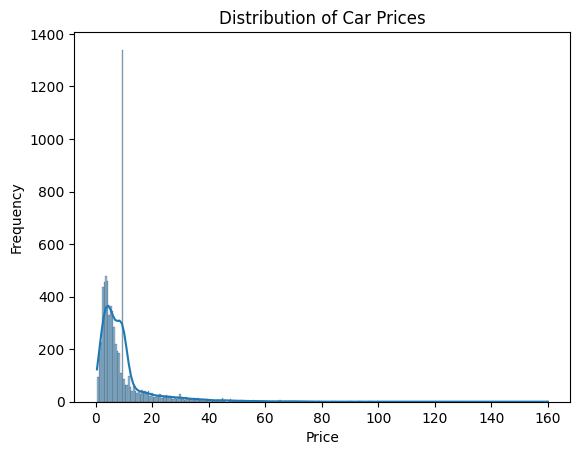

In [188]:
sns.histplot(neww_df['Price'].dropna(), kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Count of cars by fuel type

Text(0, 0.5, 'Count')

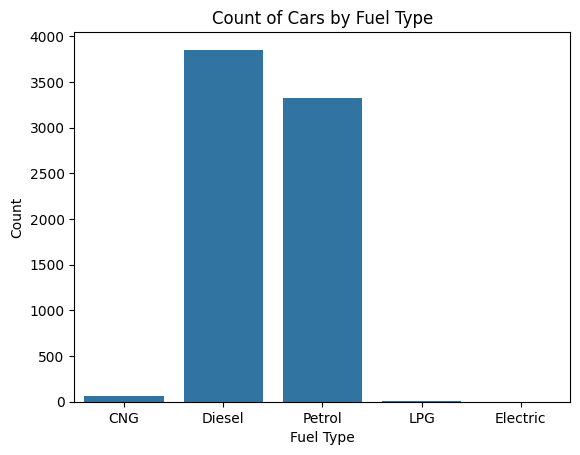

In [189]:
sns.countplot(x='Fuel_Type', data=neww_df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

Transmition count

Text(0, 0.5, 'Count')

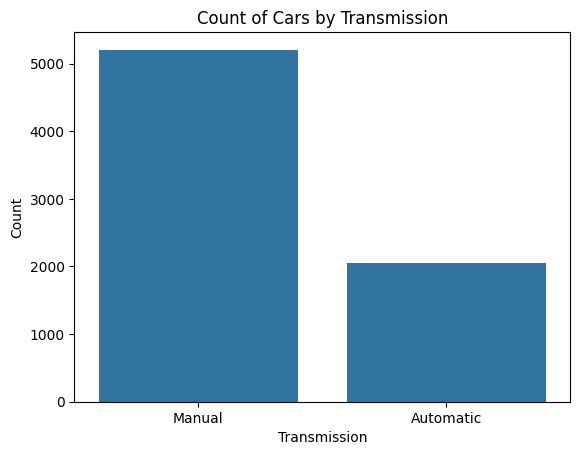

In [190]:
sns.countplot(x='Transmission', data=neww_df)
plt.title('Count of Cars by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')

Engine Size Distribution

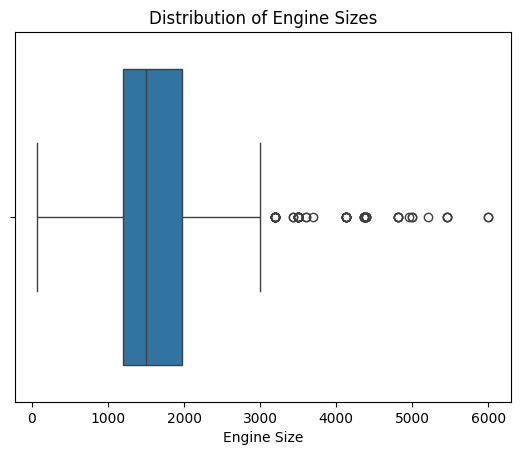

In [192]:
sns.boxplot(x='Engine', data=neww_df.dropna(subset=['Engine']))
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')
plt.show()

Price VS Kilometers Driven

Text(0, 0.5, 'Price')

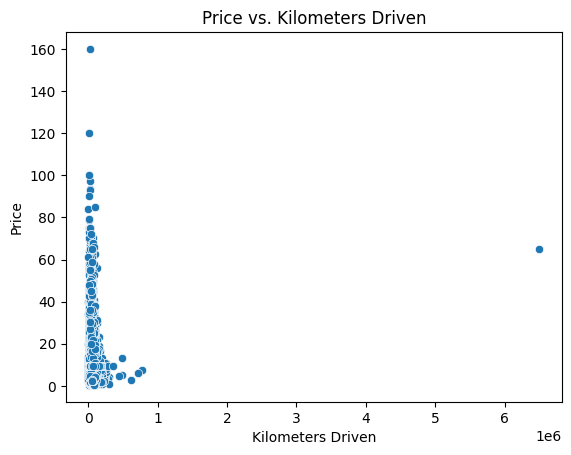

In [200]:
sns.scatterplot(x='Kilometers_Driven', y='Price', data=neww_df)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')

Price VS Fuel Type

Text(0, 0.5, 'Price')

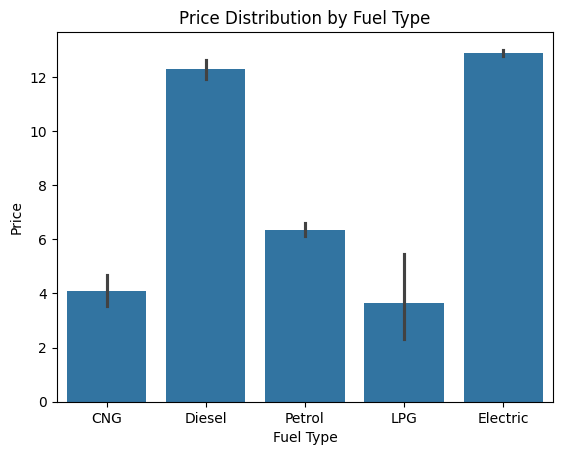

In [197]:
sns.barplot(x='Fuel_Type', y='Price', data=neww_df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

Price Vs number of Seats

Text(0, 0.5, 'Price')

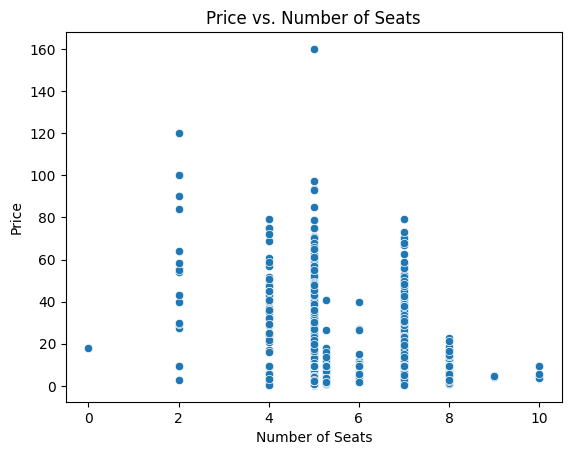

In [201]:
sns.scatterplot(x='Seats', y='Price', data=neww_df)
plt.title('Price vs. Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Price')

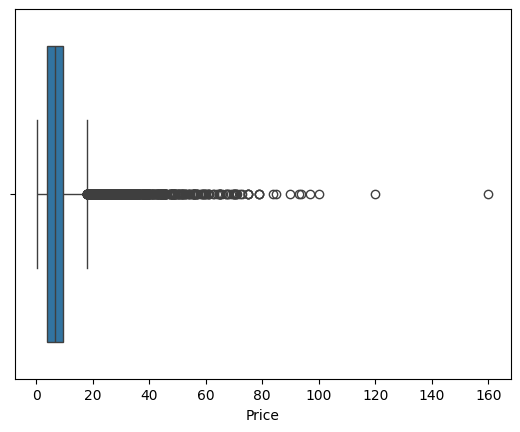

In [202]:
sns.boxplot(x="Price" , data=neww_df)
plt.xlabel("Price")
plt.show()

In [203]:
neww_df["Price"].value_counts()

,count
Price,
9.479468,1234
4.500000,88
5.500000,84
3.500000,82
4.250000,73
...,...
18.580000,1
2.320000,1
28.420000,1


# Label Encoding and One hot Encoder

In [204]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe=OneHotEncoder()
le=LabelEncoder()

In [210]:
unique_values_less_than_5=neww_df.columns[neww_df.nunique()<=5]
for i in neww_df.columns:
  if neww_df[i].dtype=="object":
    if i in unique_values_less_than_5:
      dummies = pd.get_dummies(neww_df[i], prefix=i, prefix_sep='_', drop_first=True, dummy_na=False)
      neww_df = pd.concat([neww_df, dummies], axis=1)
      neww_df.drop(columns=[i], inplace=True)
    else:
      neww_df[i]=le.fit_transform(neww_df[i])

In [213]:
for i in neww_df.columns:
  if neww_df[i].dtype=="bool":
    neww_df[i]=neww_df[i].astype(int)

In [214]:
md.data_info(neww_df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,S.No.,int64,7253,7253,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,int64,2041,7253,0,"[1310, 560, 529, 1160, 23, 583, 1499, 1933, 20..."
2,Location,int64,11,7253,0,"[9, 10, 2, 3, 5, 6, 7, 8, 4, 1, 0]"
3,Year,int64,23,7253,0,"[2010, 2015, 2011, 2012, 2013, 2016, 2018, 201..."
4,Kilometers_Driven,int64,3660,7253,0,"[72000, 41000, 46000, 87000, 40670, 75000, 869..."
5,Engine,float64,151,7253,0,"[998.0, 1582.0, 1199.0, 1248.0, 1968.0, 814.0,..."
6,Power,float64,384,7253,0,"[58.16, 126.2, 88.7, 88.76, 140.8, 55.2, 63.1,..."
7,Seats,float64,10,7253,0,"[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, 5.2797222222222..."
8,Price,float64,1374,7253,0,"[1.75, 12.5, 4.5, 6.0, 17.74, 2.35, 3.5, 17.5,..."
9,km_kg,float64,543,7253,0,"[26.6, 23.14117647058824, 24.594594594594593, ..."


# Correlation with Price

<Axes: >

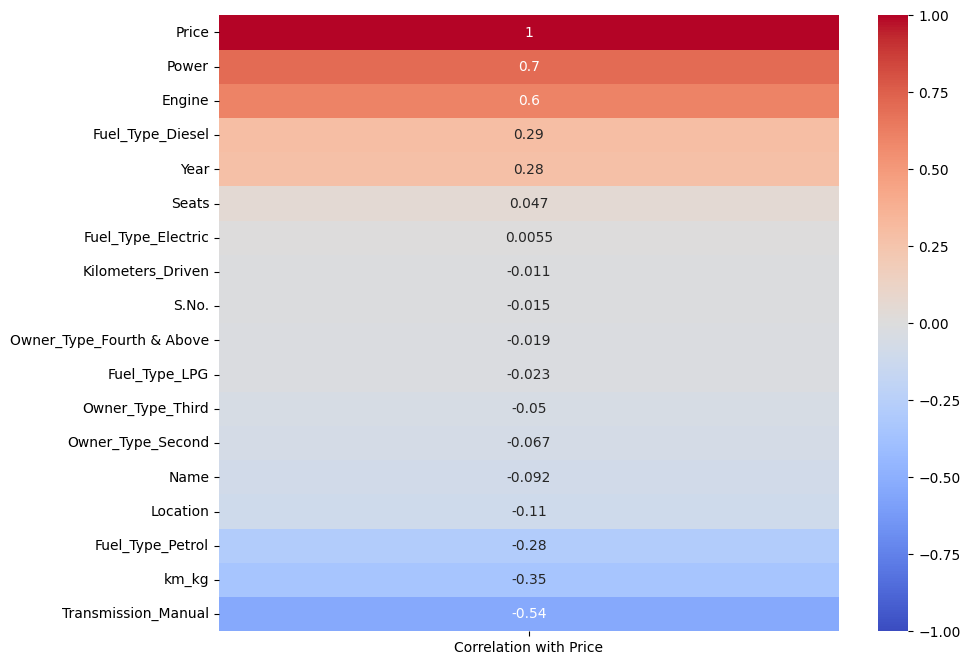

In [216]:
plt.figure(figsize=(10, 8))

corr_matrix = neww_df.corr()
corr_with_price = corr_matrix["Price"].sort_values(ascending=False)
corr_with_price_df = corr_with_price.to_frame(name="Correlation with Price")
sns.heatmap(corr_with_price_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Testing and spliting Data

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
x=neww_df.drop(columns="Price")
y=neww_df["Price"]

In [219]:
X_test,X_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

Scaling Data

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

# Linear Regression

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [225]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [226]:
y_pred=model_LR.predict(X_test)

In [230]:
mean_squared_error(y_test,y_pred)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pandas as pd

mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)
Lr_Performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred)],"MAE":[mean_absolute_error(y_test,y_pred)],"R2":[r2_score(y_test,y_pred)]})

Lr_Performance

,MSE,MAE,R2
0,45.294257,4.031285,0.571009


using scaled Values

In [236]:
model_LR_Scaled=LinearRegression()
model_LR_Scaled.fit(X_scaled_train,y_train)

LinearRegression()

In [237]:
y_pred_scaled=model_LR_Scaled.predict(X_scaled_test)

In [240]:
mean_squared_error(y_test,y_pred_scaled)
mean_absolute_error(y_test,y_pred_scaled)
r2_score(y_test,y_pred_scaled)

lr_scaled_performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred_scaled)],"MAE":[mean_absolute_error(y_test,y_pred_scaled)],"R2":[r2_score(y_test,y_pred_scaled)]})
lr_scaled_performance

,MSE,MAE,R2
0,45.294257,4.031285,0.571009


# Decesion Tree

In [244]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [245]:
model_DT=DecisionTreeRegressor()
model_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [246]:
y_pred_dt=model_DT.predict(X_test)

In [247]:
mean_squared_error(y_test,y_pred_dt)
mean_absolute_error(y_test,y_pred_dt)
r2_score(y_test,y_pred_dt)

DT_Performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred_dt)],"MAE":[mean_absolute_error(y_test,y_pred_dt)],"R2":[r2_score(y_test,y_pred_dt)]})
DT_Performance

,MSE,MAE,R2
0,38.440099,2.392124,0.635927


Using Scaled Value

In [248]:
model_DT_Scaled=DecisionTreeRegressor()
model_DT_Scaled.fit(X_scaled_train,y_train)

DecisionTreeRegressor()

In [249]:
y_pred_dt_scaled=model_DT_Scaled.predict(X_scaled_test)

In [250]:
mean_squared_error(y_test,y_pred_dt_scaled)
mean_absolute_error(y_test,y_pred_dt_scaled)
r2_score(y_test,y_pred_dt_scaled)

DT_scaled_performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred_dt_scaled)],"MAE":[mean_absolute_error(y_test,y_pred_dt_scaled)],"R2":[r2_score(y_test,y_pred_dt_scaled)]})
DT_scaled_performance

,MSE,MAE,R2
0,39.030678,2.420704,0.630333


# Random Forest

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [252]:
model_RF=RandomForestRegressor()
model_RF.fit(X_train,y_train)

RandomForestRegressor()

In [253]:
y_pred_rf=model_RF.predict(X_test)

In [254]:
mean_squared_error(y_test,y_pred_rf)
mean_absolute_error(y_test,y_pred_rf)
r2_score(y_test,y_pred_rf)

RF_Performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred_rf)],"MAE":[mean_absolute_error(y_test,y_pred_rf)],"R2":[r2_score(y_test,y_pred_rf)]})
RF_Performance

,MSE,MAE,R2
0,21.816909,1.883329,0.793368


Using Scaled Values

In [255]:
model_RF_Scaled=RandomForestRegressor()
model_RF_Scaled.fit(X_scaled_train,y_train)

RandomForestRegressor()

In [256]:
y_pred_rf_scaled=model_RF_Scaled.predict(X_scaled_test)

In [257]:
mean_squared_error(y_test,y_pred_rf_scaled)
mean_absolute_error(y_test,y_pred_rf_scaled)
r2_score(y_test,y_pred_rf_scaled)

RF_scaled_performance=pd.DataFrame({"MSE":[mean_squared_error(y_test,y_pred_rf_scaled)],"MAE":[mean_absolute_error(y_test,y_pred_rf_scaled)],"R2":[r2_score(y_test,y_pred_rf_scaled)]})
RF_scaled_performance

,MSE,MAE,R2
0,20.920608,1.859226,0.801857
